/Users/shaoweiwu/Documents/dune_lstm/utils/binstat.py:132: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  _fig, _ax = plt.subplots(


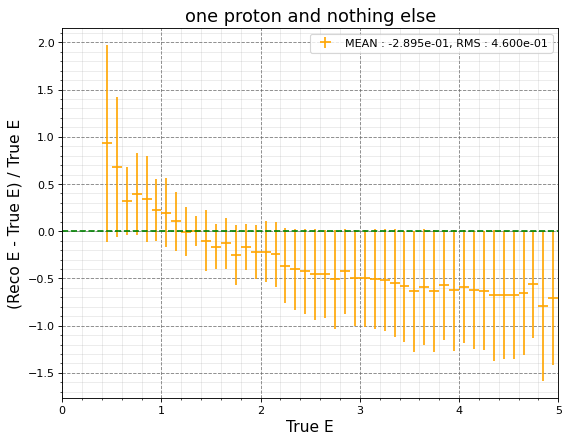

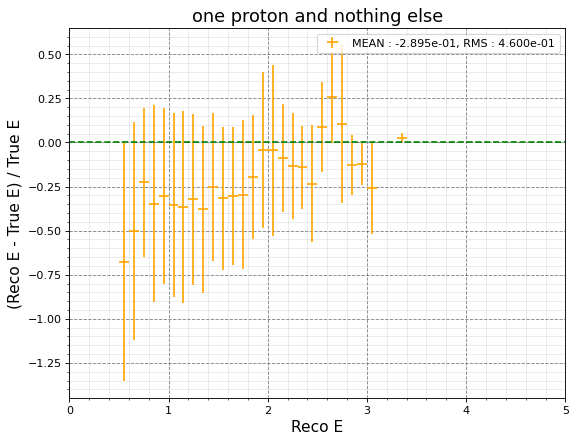

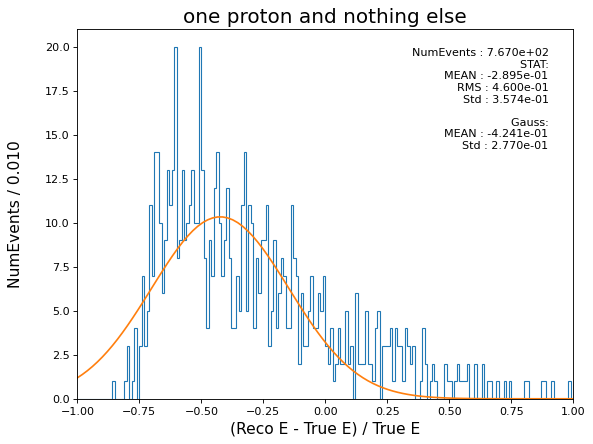

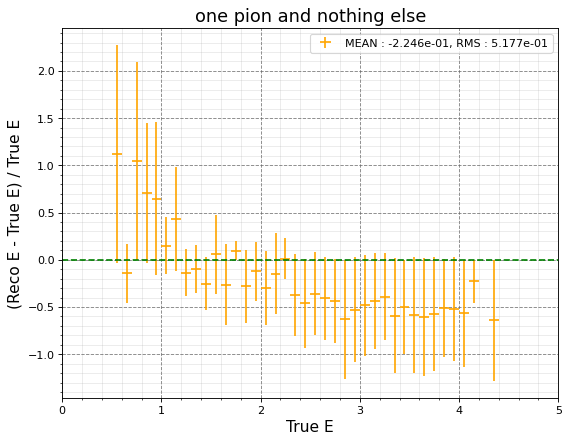

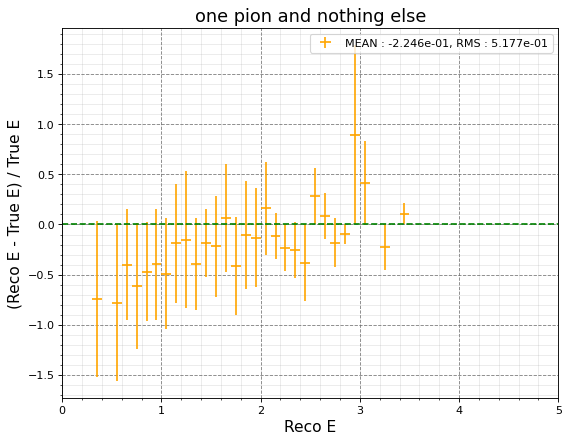

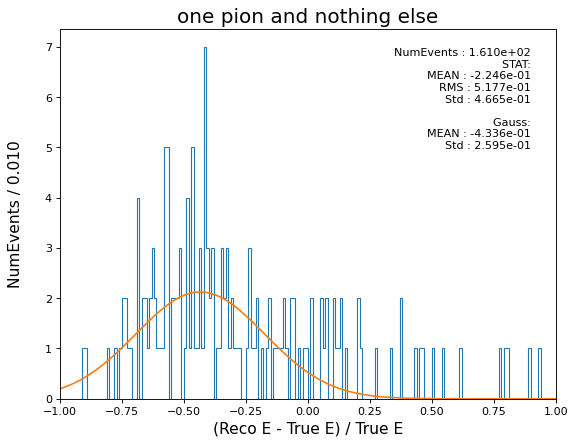

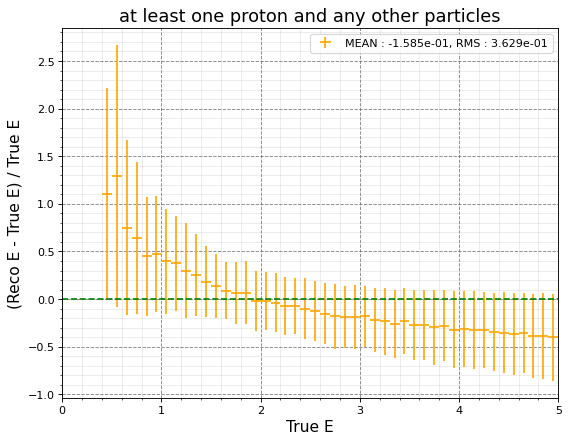

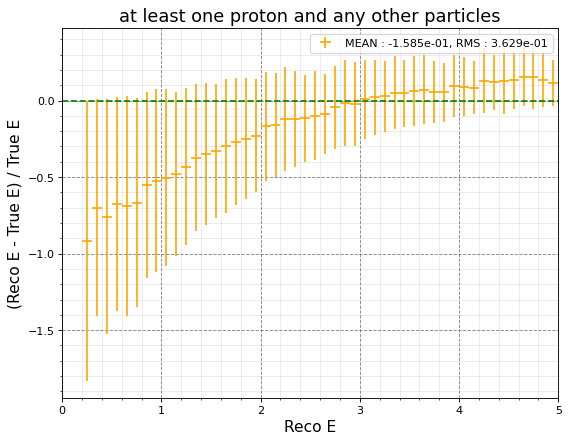

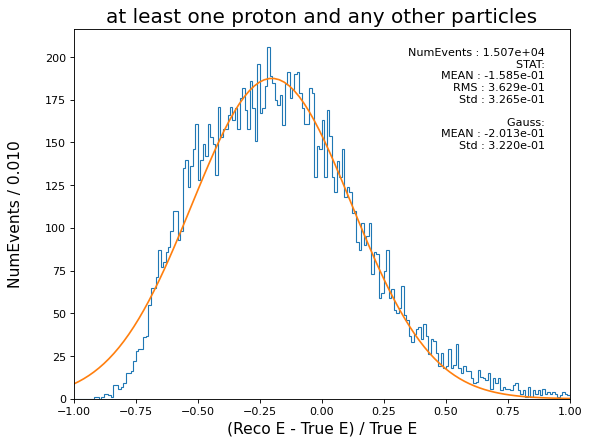

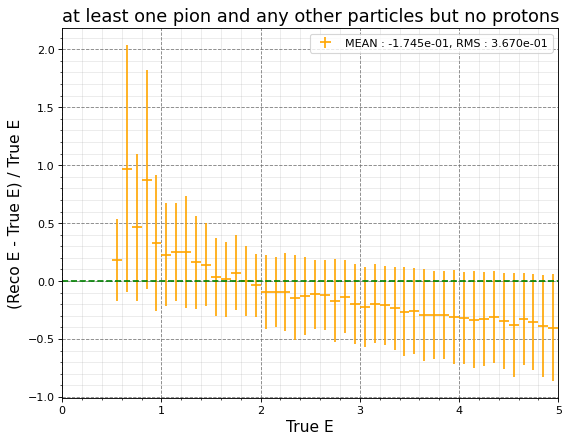

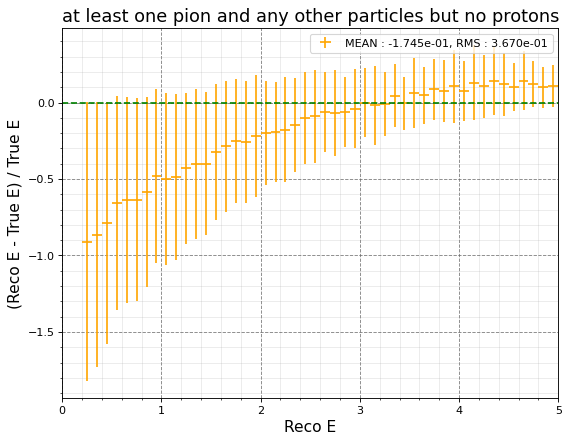

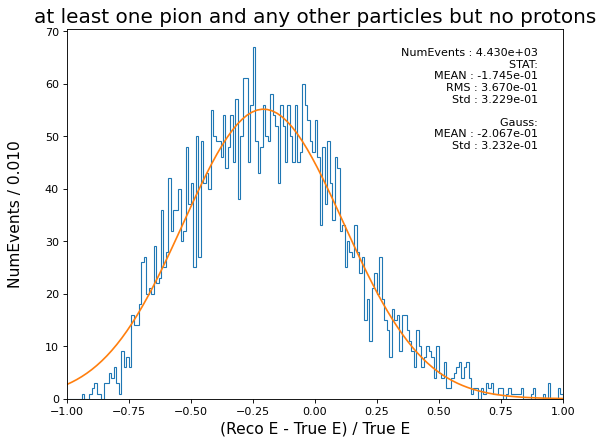

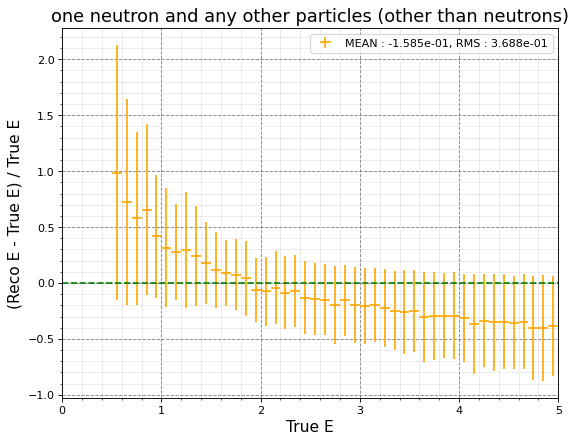

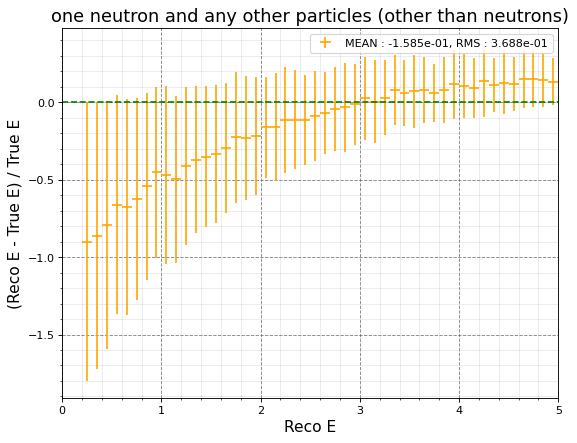

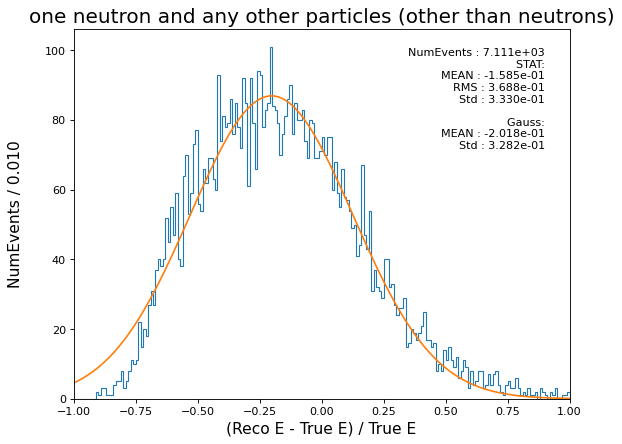

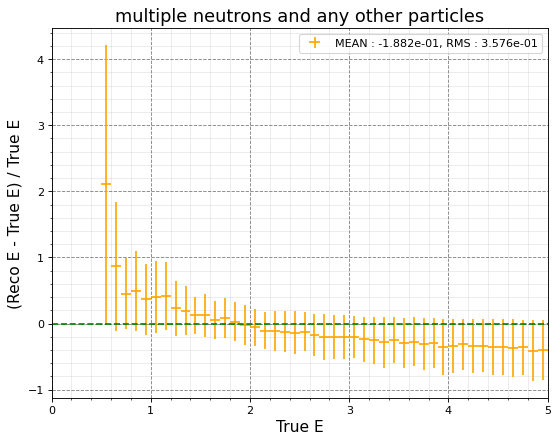

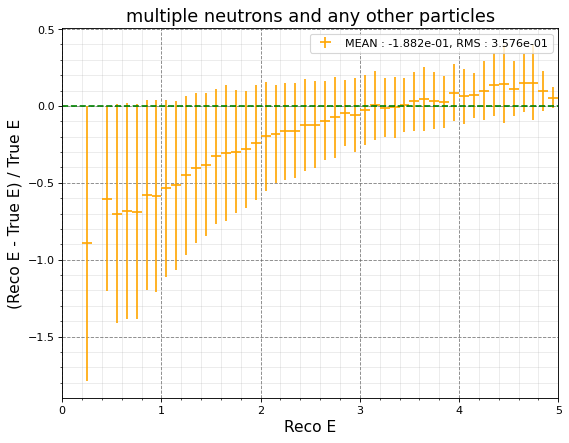

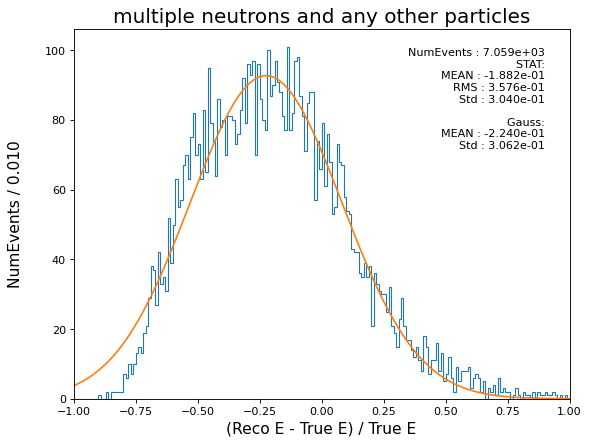

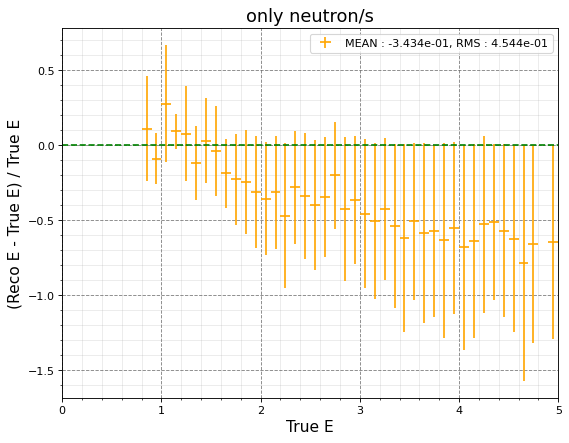

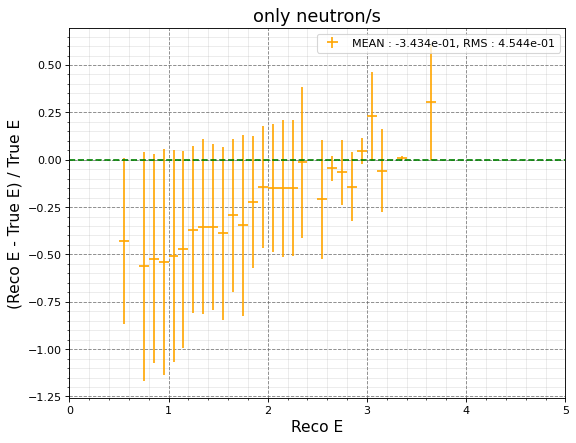

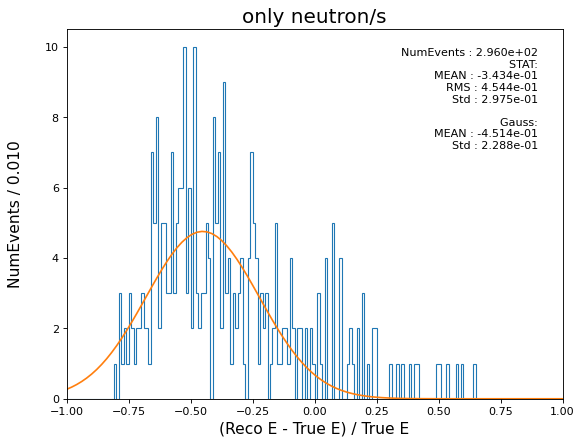

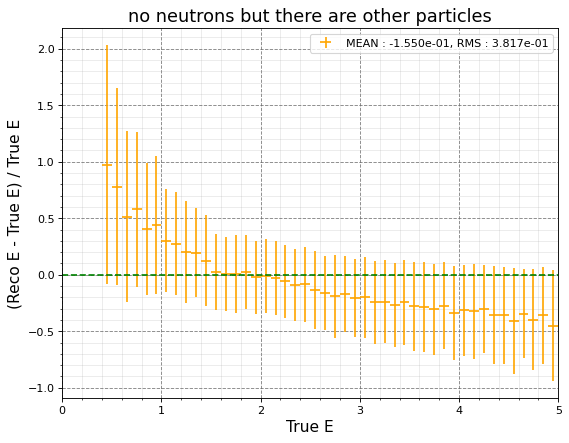

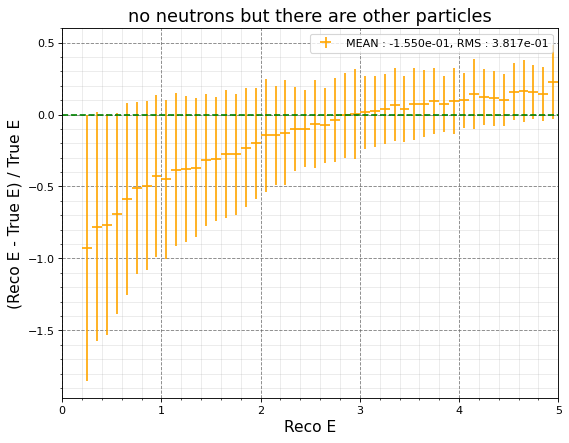

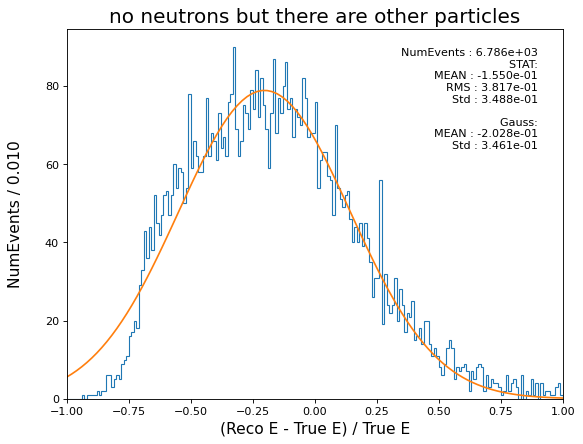

In [1]:
# make plot of resolution for different FSI
import pickle
import matplotlib.pyplot as plt
from utils.fs_cut import FSIdic
from utils.binstat import plot_xstat, plot_y_hist
import pandas as pd

for i in [1, 2, 3, 4, 6, 7, 8, 9]:
    filename = "result"
    data = pd.read_csv('data/kEcut20MeV_01e8maxtraceE/testset_with_FSIcut/FSI_'+ str(i) +'.csv.xz')
    predt, truet = data['lstm_EE_pred.total'], data['mc.nuE']

    basename = filename+str(i)

    _, _, _ = plot_xstat(
        truet,
        (predt - truet) / truet,
        bins=50,
        range=(0, 5),
        outdir="plot/FSIplot01e8",
        name=basename + "_xstat",
        title=FSIdic[i],
        ext="pdf",
        xlabel="True E",
        ylabel="(Reco E - True E) / True E",
    )
    _, _, _ = plot_xstat(
        predt,
        (predt - truet) / truet,
        bins=50,
        range=(0, 5),
        outdir="plot/FSIplot01e8",
        name=basename + "_xstat_xreco",
        title=FSIdic[i],
        ext="pdf",
        xlabel="Reco E",
        ylabel="(Reco E - True E) / True E",
    )

    plot_y_hist(
        (predt - truet) / truet,
        range=(-1, 1),
        outdir="plot/FSIplot01e8",
        name=basename + "_yhist",
        title=FSIdic[i],
        bins=200,
        xlabel="(Reco E - True E) / True E",
    )
